In [77]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d

sys.path.insert(0, "../")

sys.path.insert(0, "~/home/")
# import warnings
# warnings.filterwarnings('ignore')

from michael import janet

In [78]:
uni = pd.read_csv("/Users/oliver.hall/Research/unicorn/data/unicorn.csv", index_col=0)

In [79]:
index = 1#uni[uni.source_id == int(48977371798954368)].index[0]

/Users/oliver.hall/Research/michael/Examples/../michael/janet.py:227: UserWarning: RUNNING ON TARGET 1, 2174289161681454720, tess-sip
  warnings.warn(f'RUNNING ON TARGET {index}, {df.loc[index, "source_id"]}, {pipeline}')


Target DR3 ID 2174289161681454720 has tesscut data available on MAST for Sectors 16, 17, 56, 57
Inflating...
Data already downloaded for Sector 17.
Data already downloaded for Sector 56.
Data already downloaded for Sector 57.


Running pixels in aperture: 100%|█████████████| 300/300 [00:03<00:00, 86.67it/s]
/Users/oliver.hall/Research/michael/Examples/../michael/janet.py:147: UserWarning: Your upper period limit is longer than half your longest set of consecutive TESS sectors. You'll be more prone to harmonics.
  warnings.warn(UserWarning("Your upper period limit is longer than half your "+


Period range automatically set to 0.75x the length of the longest baseline.
For this target, this is 40.5 days.
### Running Simple Astropy Lomb-Scargle on Sector 16-17 on star 2174289161681454720 ###
### Completed Simple Astropy Lomb-Scargle for Sector 16-17 on star 2174289161681454720 ###
### Running Wavelet Estimation for Sector 16-17 on star 2174289161681454720 ###


100%|█████████████████████████████████████████| 761/761 [00:21<00:00, 35.55it/s]


### Completed Wavelet Estimation for Sector 16-17 on star 2174289161681454720 ###
### Running Composite ACF estimation for Sector 16-17 on star 2174289161681454720 ###
### Completed Composite ACF estimation for Sector 16-17 on star 2174289161681454720 ###
### Running ACF Estimation on star 2174289161681454720 ###
### Completed ACF Estimation for Sector 16-17 on star 2174289161681454720 ###
### Running Simple Astropy Lomb-Scargle on Sector 56-57 on star 2174289161681454720 ###
### Completed Simple Astropy Lomb-Scargle for Sector 56-57 on star 2174289161681454720 ###
### Running Wavelet Estimation for Sector 56-57 on star 2174289161681454720 ###


100%|█████████████████████████████████████████| 848/848 [02:49<00:00,  4.99it/s]


### Completed Wavelet Estimation for Sector 56-57 on star 2174289161681454720 ###
### Running Composite ACF estimation for Sector 56-57 on star 2174289161681454720 ###
### Completed Composite ACF estimation for Sector 56-57 on star 2174289161681454720 ###
### Running ACF Estimation on star 2174289161681454720 ###
### Completed ACF Estimation for Sector 56-57 on star 2174289161681454720 ###


/Users/oliver.hall/Research/michael/Examples/../michael/validate.py:103: RuntimeWarning: invalid value encountered in less
  c = np.abs(np.diff(best[['ACF', 'CACF']])) < ebest[['e_CACF']].values
/Users/oliver.hall/Research/michael/Examples/../michael/validate.py:173: UserWarning: One or more sectors disagree strongly across all estimates. Please inspect the results carefully yourself.
  warnings.warn("One or more sectors disagree strongly across all estimates. Please inspect the results carefully yourself.")
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  

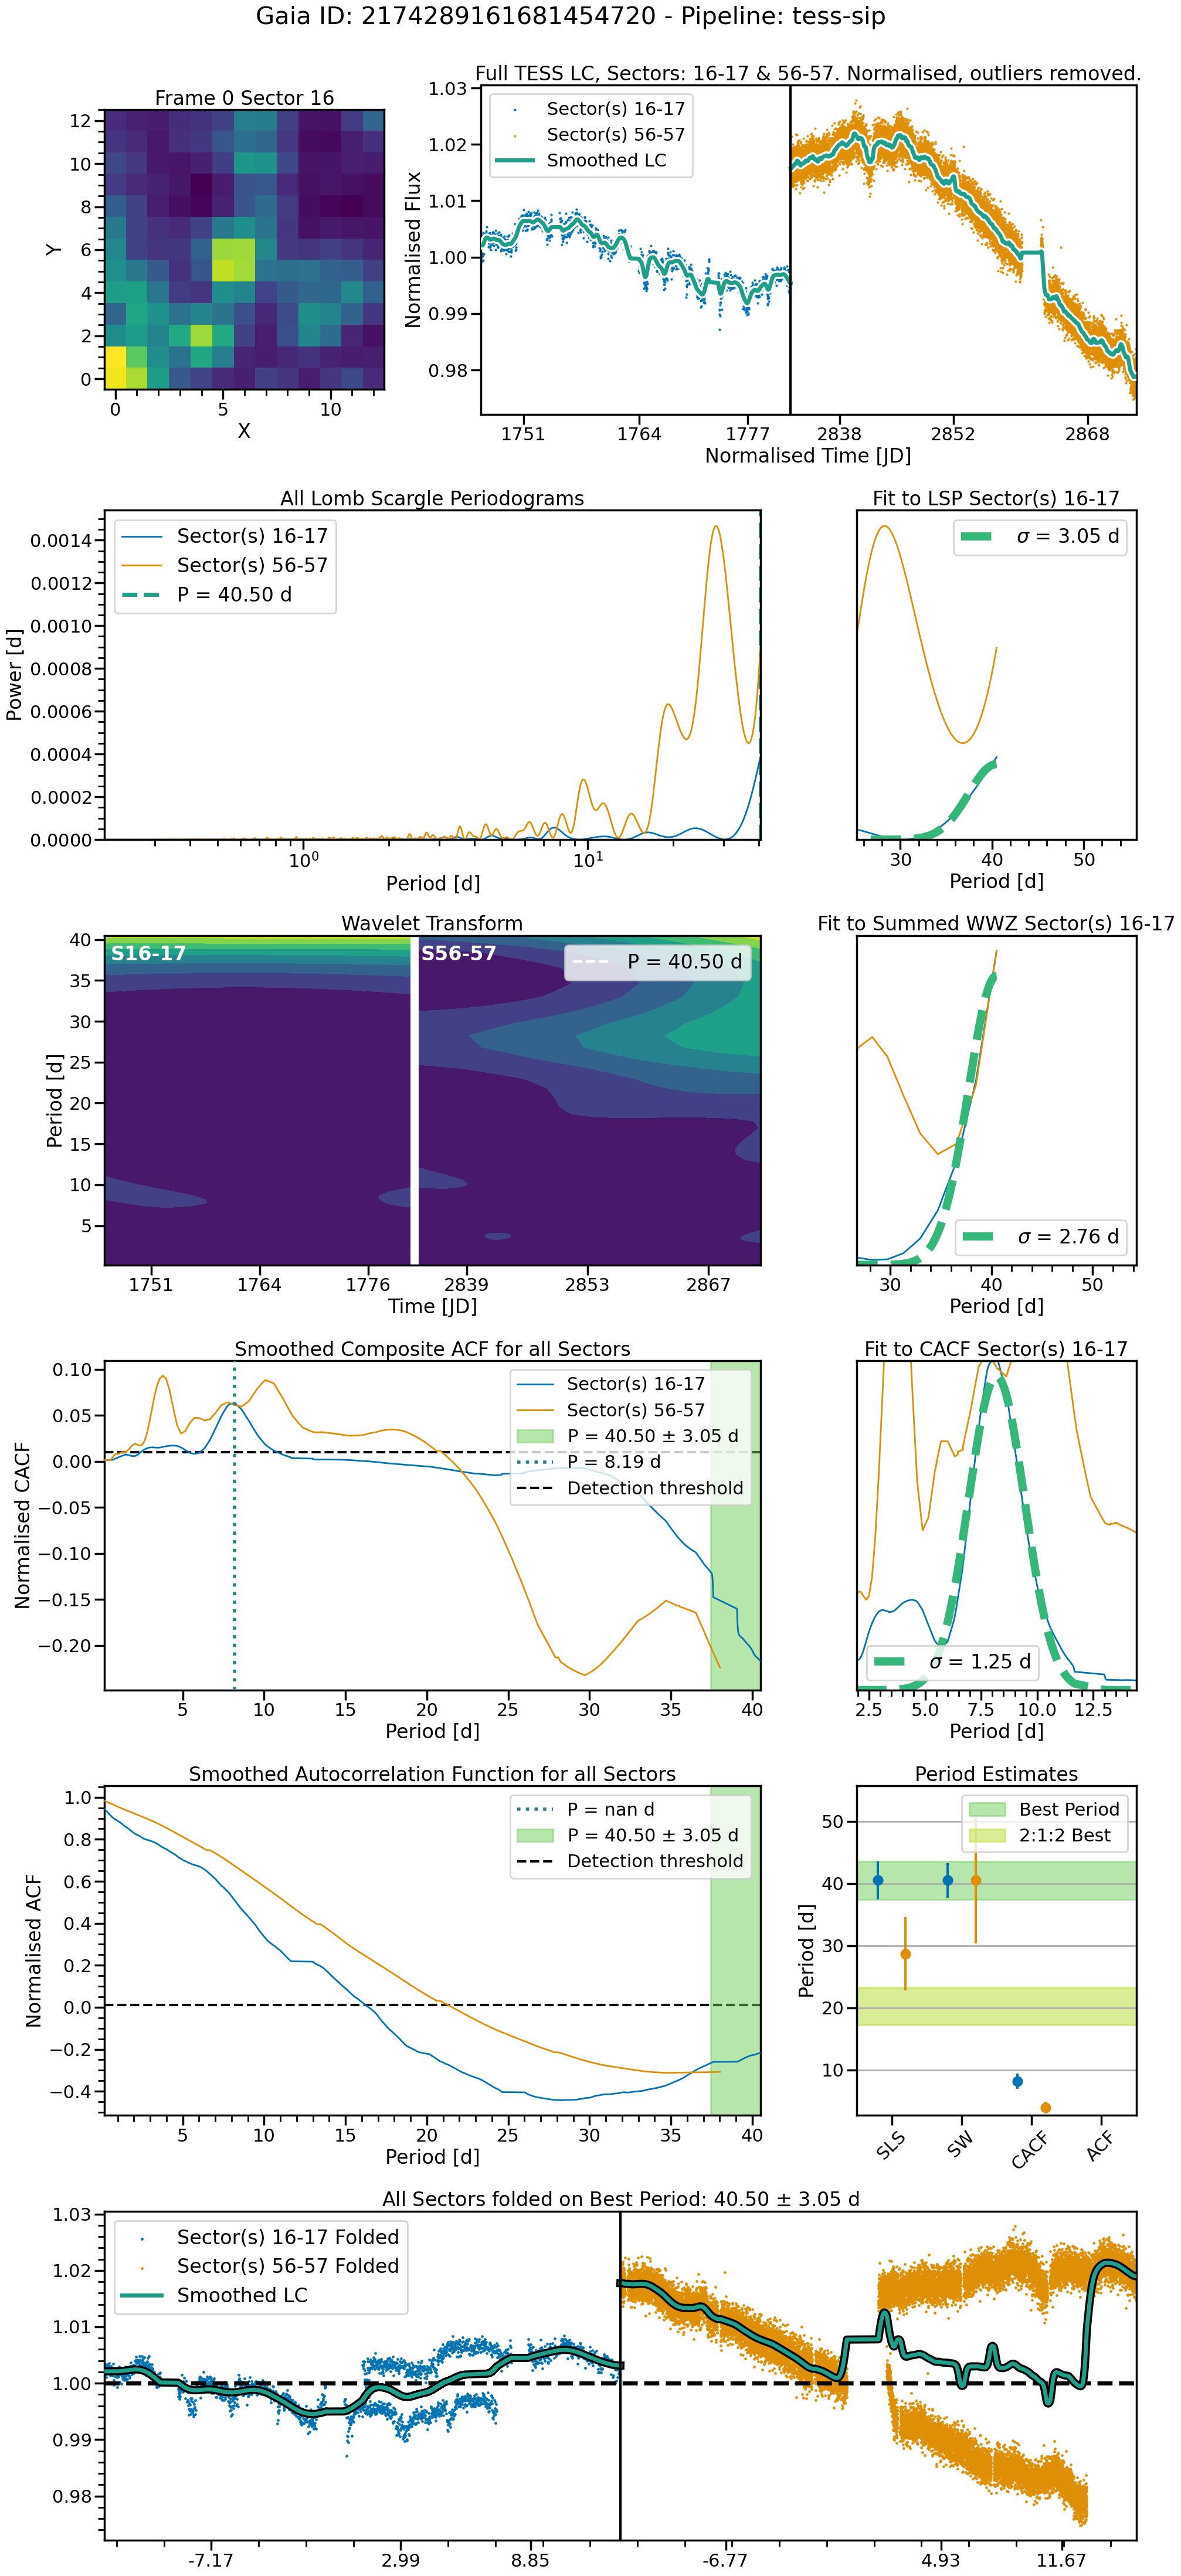

In [80]:
for method in ['tess-sip']:#'eleanor', 'eleanor-corner','eleanor-pca', 'unpopular','tess-sip', 'tess-sip-detrended']:
    j = janet.boot(uni, index=index, pipeline = method)
    j.prepare_data()
#     j.get_rotation(period_range = (10, 30))
    j.get_rotation()
    j.validate_rotation()
    j.view()
    plt.show()

Let's have a look at the raw input flux, the corrected flux, and the periodograms of both.

In [106]:
r = j.void['r_16-17']
list(r)

['periods',
 'power',
 'raw_lc',
 'corr_lc',
 'period_at_max_power',
 'model',
 'power_bkg',
 'raw_lc_bkg']

In [82]:
from tess_sip import SIP

In [ ]:
rr = SIP(j.void['tpfs_16-17'], 
         min_period = j.period_range[0], max_period = j.period_range[1],
         nperiods = len(j.void['pg_16-17'].period)//10,
        npca_components=20)

Running pixels in aperture: 100%|██████████▉| 2531/2537 [00:39<00:00, 78.98it/s]

In [ ]:
ax = r['raw_lc'].plot()
r['corr_lc'].plot(ax=ax, label='range 10-100')
rr['corr_lc'].plot(ax=ax, label='range 0.2-40.5')

In [ ]:
ax = r['raw_lc'].plot()
ax.plot(r['raw_lc'].time.value, r['model'].value, lw=1, label='range 10-100')
ax.plot(r['raw_lc'].time.value, rr['model'].value, lw=1, label='range 0.2-40')
ax.legend()

The resulting corrected lightkurve is based on a correction model that included the fit period. The tess-sip approach should focus on the SIP only - the SIP is powerful, the corrected light curve ironically is not in this scenario.

In [ ]:
ax = j.void['pg_16-17'].plot()
# ax.plot(r['periods'], r['power'], lw=1)
ax.plot(rr['periods'], rr['power'], lw=1, label='')
rr['corr_lc'].to_periodogram(minimum_period = j.period_range[0], maximum_period=j.period_range[1]).plot(ax=ax, view='period')
# ax.set_xlim(j.period_range)
# # ax.set_yscale('log')

In [ ]:
len(rr['periods'])

In [ ]:
fig, ax = plt.subplots()
ax.plot(rr['periods'], rr['power'])
period = rr['periods'][np.argmax(rr['power'])]
ax.axvline(period)

In [ ]:
rr['corr_lc'].fold(period).scatter()

In [ ]:
ax = rr['corr_lc'].plot()
r['corr_lc'].plot(ax=ax)

The folded light curve is kinda maniupulated to be always good by definition?